In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special

In [30]:
def integ(x):
    return x*special.jv(0,x)
lra=[]
jar=[]
for llr in np.arange(-1.,2.,.01):
    lr=10.**llr
    j = integrate.quad(integ,0,lr)
    lra.append(lr)
    jar.append(j[0])

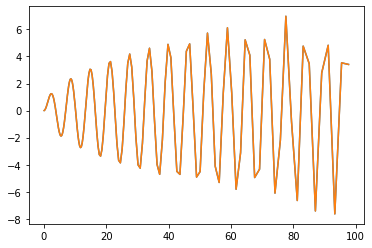

In [31]:
lra=np.array(lra)
plt.plot(lra,jar)
plt.plot(lra,lra*special.jv(1,lra))

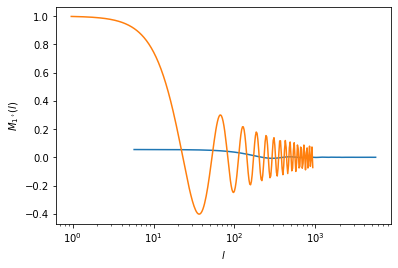

In [38]:
## The fourier transform of the window function is 2\pi R J_1(lR)/lR. Plot this for R=1 degree
l=lra/(np.pi/180.)
plt.plot(l,2*np.pi*special.jv(1,lra)/l)
plt.xlabel('$l$')
plt.xscale('log')
plt.ylabel('$M_{1^\circ}(l)$')
plt.savefig('mask.png')
# w(theta) is the fourier transform of CL, so roughly 
#. w = \int dl/l l^2C_l J_0(l\theta)
plt.plot(l/6.,special.jv(0,lra))

In [25]:
def int2(x):
    return special.jv(1,x)**2/x
result=integrate.quad(int2,0.,1000.)
print(result)

(0.49968466334489553, 0.0009814749595778223)


/var/folders/yt/44r1mdln1k7_0595qvt97vd00000gn/T/ipykernel_8006/329343498.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result=integrate.quad(int2,0.,1000.)


## Normalization of $\Theta$
We require $$\int d^2\theta_1 \int d^2\theta_2 \delta_R(\vec\theta_1) \delta_R(\vec\theta_2) \Theta_\theta(|\vec\theta_1-\vec\theta_2|)$$
to reduce to $w(\theta)$. Taking out the $R$ subscript, this becomes
\begin{equation}
\int_R%_{\theta_i\ in R} 
d^2\theta_1 
\int_R d^2\theta_2%_{\theta_2\ in R} 
w(\vec\theta_1-\vec\theta_2) 
\Theta_\theta(|\vec\theta_1-\vec\theta_2|) \end{equation}
If $R$ were very large, then we could simply define $\theta_-=\theta_+-\theta_-$ and then do the $\theta_1$ integral yielding a factor of $A$, the area. Then we would require
$$ 1 = A \int_0^R d\theta\theta \Theta_\theta(\theta) \int_0^{2\pi} d\phi$$
or
$$1=2\pi A \theta \int_0^R d\theta \Theta_\theta(\theta)$$.
So $\Theta_\theta()$ is sharply peaked at its argument. If it has a width $\Delta\theta$, then
$$ \Theta_\theta(x) = \frac{1}{2\pi A\theta\Delta\theta} f_\theta(x)$$
where $f$ just constrains its argument in the integrand to be equal to $\theta$ and when integrated over yields a width of $\Delta\theta$.

## Fourier Transform of $\Theta$

$$\tilde\Theta_\theta(\vec l) = \int d^2\phi e^{i\vec l\cdot\vec\phi} \Theta_\theta(\vec\phi)$$
Since $\Theta$ depends only on the magnitude of its argument
\be
$$\tilde\Theta_\theta(\vec l) = \int_0^\infty d\phi\phi \Theta_\theta(\phi)\int_0^{2\pi} d\alpha e^{il\phi\cos\alpha}$$
The azimuthal integral is $2\pi J_0(l\phi)$, so
$$\tilde\Theta_\theta(\vec l) = 2\pi \int_0^\infty d\phi\phi \Theta_\theta(\phi) J_0(l\phi)$$
If we assume that $J_0$ is not oscillating too rapidly (meaning we are not in the regime $l\theta\gg 1$, then
$$\tilde\Theta_\theta(\vec l) = \frac{2\pi \theta J_0(l\theta)}{2\pi A\theta\Delta\theta} \int_0^\infty d\phi f_\theta(\phi) $$
or
$$\tilde\Theta_\theta(\vec l) = \frac{\theta J_0(l\theta)}{A} $$

